<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Programming For Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 2.0 - Exploratory data analysis
</div>

## Import

In [2]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

## Exploring data

### Read cleaned data from file

We can now use the cleaned dataset for analysis. Thus, we first read the CSV files we created in the previous pre-processing task.

In [3]:
cleaned_df = pd.read_csv('../data/processed/IMDbMovies_processed.csv')

In [4]:
# TEST
cleaned_df.head()

Title  \
0                                           Napoleon   
1  The Hunger Games: The Ballad of Songbirds & Sn...   
2                                         The Killer   
3                                                Leo   
4                                       Thanksgiving   

                                             Summary  \
0  An epic that details the checkered rise and fa...   
1  Coriolanus Snow mentors and develops feelings ...   
2  After a fateful near-miss, an assassin battles...   
3  A 74-year-old lizard named Leo and his turtle ...   
4  After a Black Friday riot ends in tragedy, a m...   

                                            Director  \
0                                       Ridley Scott   
1                                   Francis Lawrence   
2                                      David Fincher   
3  David Wachtenheim,Robert Smigel,Robert Marianetti   
4                                           Eli Roth   

                                          Writer                 Main Genres  \
0                                   David Scarpa  Action,Adventure,Biography   
1  Michael Lesslie,Michael Arndt,Suzanne Collins      Action,Adventure,Drama   
2  Andrew Kevin Walker,Luc Jacamon,Alexis Nolent      Action,Adventure,Crime   
3           Paul Sado,Robert Smigel,Adam Sandler     Animation,Comedy,Family   
4                          Eli Roth,Jeff Rendell     Horror,Mystery,Thriller   

  Motion Picture Rating  Runtime (Minutes)  Release Year  Rating (Out of 10)  \
0                     R              158.0        2023.0                 6.7   
1                 PG-13              157.0        2023.0                 7.2   
2                     R              118.0        2023.0                 6.8   
3                    PG              102.0        2023.0                 7.0   
4                     R              106.0        2023.0                 7.0   

   Number of Ratings (in thousands)  Budget (in milions)  \
0                              38.0                 67.8   
1                              37.0                100.0   
2                             117.0                 67.8   
3                              10.0                 67.8   
4                               9.1                 67.8   

   Gross in US & Canada (in milions)  Gross worldwide (in milions)  \
0                          37.514498                     84.968381   
1                         105.043414                    191.729235   
2                          46.800000                      0.421332   
3                          46.800000                     87.100000   
4                          25.408677                     29.666585   

   Opening Weekend Gross in US & Canada (in milions)  
0                                          20.638887  
1                                          44.607143  
2                                          12.500000  
3                                          12.500000  
4                                          10.306272

In [5]:
# TEST
cleaned_df.shape

(9083, 14)

## Question: What movie genres work well together?

### Step 0: Purpose
- Help production knows which movie genres can be easily combined, thereby increasing the company's profits based on popular genres that audiences often choose to watch.

### Step 1: Analyzing
- We will consider the `Name` and `Genre` columns. We create a matrix with row and column labels are `genres`. We then count the number of common occurrences of each pair of categories and save them in matrix. Finally, we visualize by drawing a heatmap with the lower half of the matrix.

In [6]:
# preprocessing
fixed_df = cleaned_df[['Title', 'Main Genres']].reset_index(drop = True)
fixed_df['Main Genres'] = fixed_df['Main Genres'].str.split(',')
fixed_df = fixed_df.explode('Main Genres')
fixed_df = fixed_df.query("`Main Genres` == `Main Genres`")

In [7]:
combination_df = pd.DataFrame(index = fixed_df['Main Genres'].unique(), columns = fixed_df['Main Genres'].unique())

# assign the count of combination
for i in range(len(fixed_df['Main Genres'].unique()) - 1):
    for j in range(i + 1, len(fixed_df['Main Genres'].unique())):
        temp = fixed_df[(fixed_df['Main Genres'] == fixed_df['Main Genres'].unique()[i]) | 
                        (fixed_df['Main Genres'] == fixed_df['Main Genres'].unique()[j])].index
        combination_df.at[fixed_df['Main Genres'].unique()[i], fixed_df['Main Genres'].unique()[j]] = temp.shape[0] - temp.nunique() if temp.shape[0] - temp.nunique() else 0
combination_df = combination_df.T.fillna(0)
combination_df

Action  Adventure  Biography  Drama  Crime  Animation  Comedy  \
Action            0          0          0      0      0          0       0   
Adventure       875          0          0      0      0          0       0   
Biography        50         41          0      0      0          0       0   
Drama           661        395        536      0      0          0       0   
Crime           618         71        120    934      0          0       0   
Animation       108        336          4     65      5          0       0   
Comedy          441        604         66   1052    364        233       0   
Family           39        209         13    156      7         45     291   
Horror          157         63          4    322     67          3     195   
Mystery          84         35          3    484    245          2      73   
Thriller        508        108         10    591    401          2      64   
History          47         15        118    288     10          1      16   
Fantasy         183        213          3    247     17         24     244   
Sci-Fi          327        205          0    183     23          5      92   
Romance          37         41         38   1006     55          2     718   
Music             2          3         44    175     11          2     105   
Sport            21          6         37    127      7          0      65   
Musical           0          4          2     59      8          1      61   
Documentary       3          2         19      6     12          1       5   
War              37         13          9    142      0          2      19   
Western          15         15          4     83      3          0      14   
Film-Noir         0          1          0     31     27          0       1   

             Family  Horror  Mystery  ...  Fantasy  Sci-Fi  Romance  Music  \
Action            0       0        0  ...        0       0        0      0   
Adventure         0       0        0  ...        0       0        0      0   
Biography         0       0        0  ...        0       0        0      0   
Drama             0       0        0  ...        0       0        0      0   
Crime             0       0        0  ...        0       0        0      0   
Animation         0       0        0  ...        0       0        0      0   
Comedy            0       0        0  ...        0       0        0      0   
Family            0       0        0  ...        0       0        0      0   
Horror            2       0        0  ...        0       0        0      0   
Mystery           1     367        0  ...        0       0        0      0   
Thriller          0     423      322  ...        0       0        0      0   
History           4       2        3  ...        0       0        0      0   
Fantasy         114     168       43  ...        0       0        0      0   
Sci-Fi            6     197       90  ...       14       0        0      0   
Romance          34      17       45  ...       70      42        0      0   
Music             6       6        4  ...        5       1       46      0   
Sport            12       0        0  ...        2       2       22      0   
Musical          11       5        1  ...       10       2       35     12   
Documentary       0       4        3  ...        1       0        0     11   
War               0       1        2  ...        1       1       26      0   
Western           0       1        3  ...        0       0       11      0   
Film-Noir         0       0        9  ...        0       0        5      0   

             Sport  Musical  Documentary  War  Western  Film-Noir  
Action           0        0            0    0        0          0  
Adventure        0        0            0    0        0          0  
Biography        0        0            0    0        0          0  
Drama            0        0            0    0        0          0  
Crime            0        0            0    0        0          0  
Animation      

### Step 2: Visualization

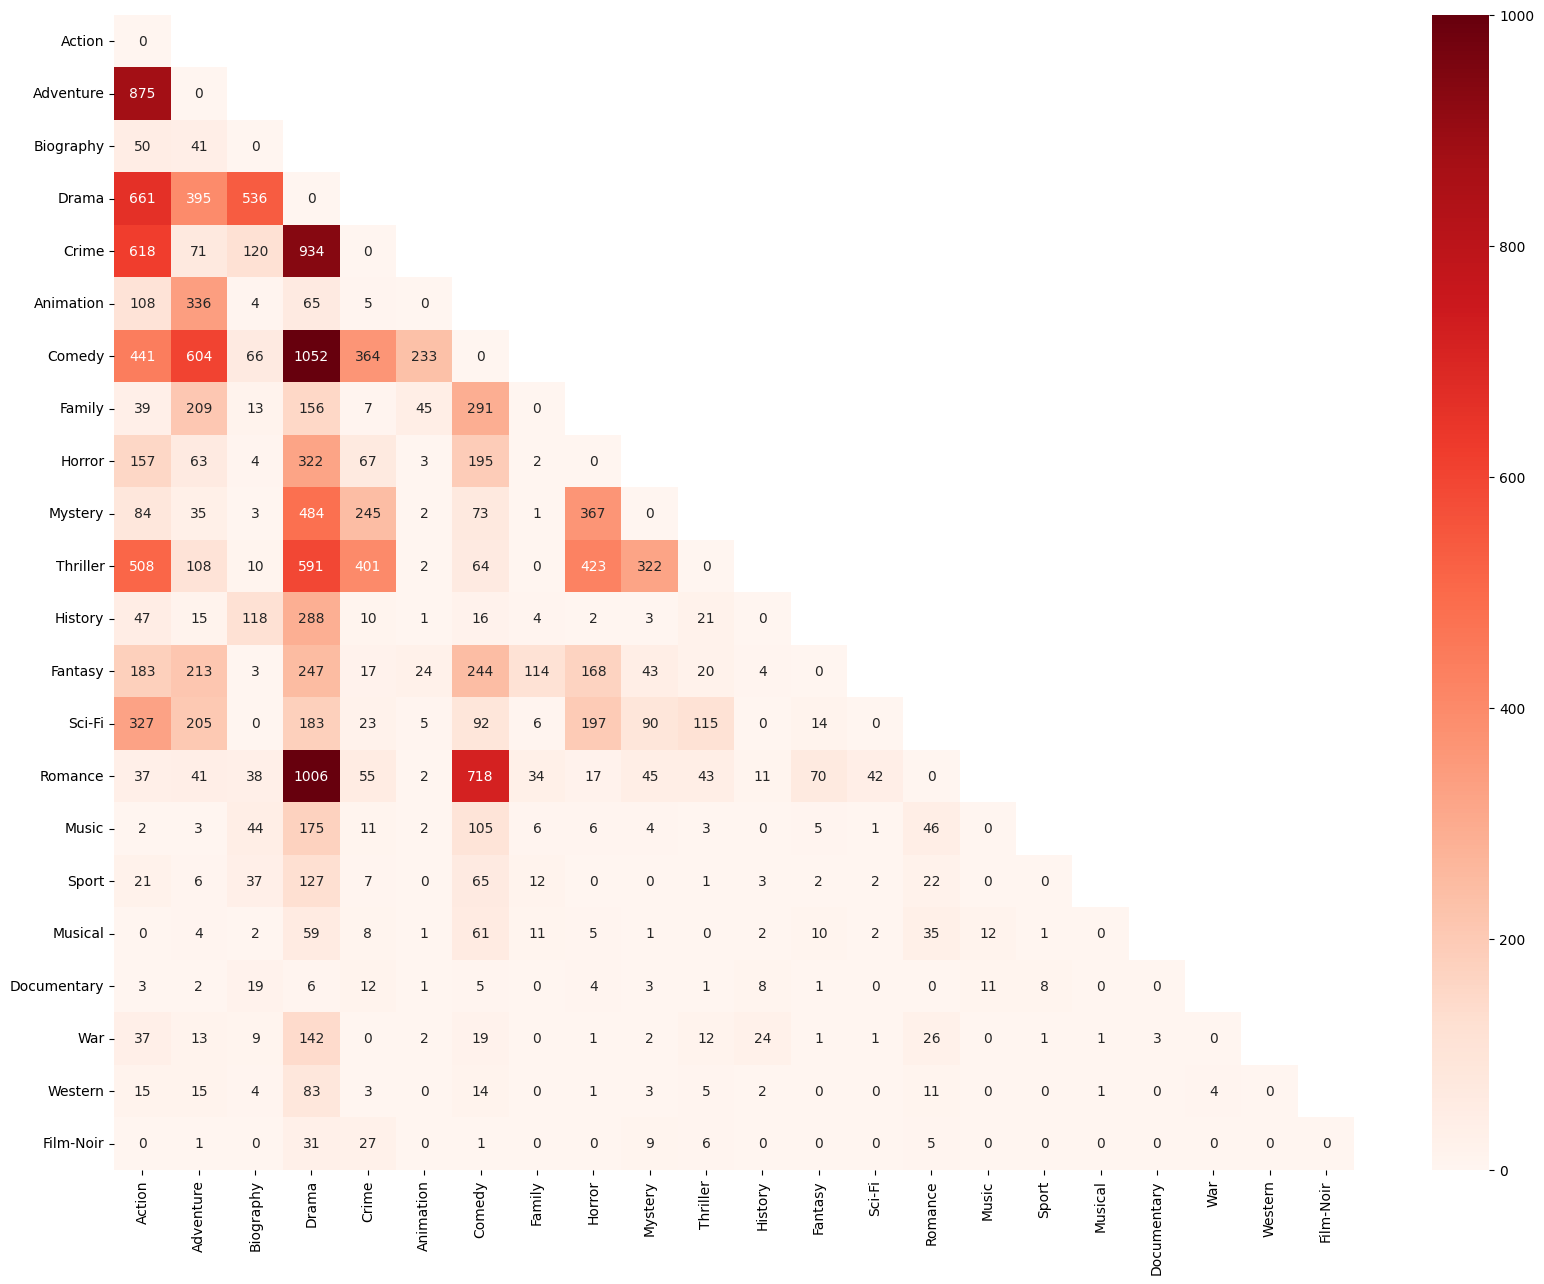

In [8]:
plt.figure(figsize = (20, 15))
mask = np.triu(np.ones_like(combination_df), k = 1)
sns.heatmap(combination_df, annot = True, fmt = 'd', cmap = 'Reds', mask = mask, vmin = 0, vmax = 1000)
plt.show()

### Step 3: Give Observation
- According to the heatmap, we can see some pairs of genres have combined regularly:
    - `Action` and `Adventure`.
    - `Drama` and `Romance`.
    - `Drama` and `Comedy`.
    - `Drama` and `Crime`.
- That's understandable because their nature is the same. One side is a movie genre that brings dramatic suspense, the other side brings laughter or a feeling of relaxation.
- In conclusion, we recommend that filmmakers should make genre combination as below:
    - `Action` and `Adventure`.
    - `Drama`, `Romance` and `Comedy`.
    - `Drama` and `Crime`.